In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
df_usdfomc = pd.read_excel('USD_FOMC_Data.xlsx', skiprows=range(1))
header = df_usdfomc.iloc[0, :]
df_usdfomc.columns = header
df_usdfomc.index = df_usdfomc['S/N']
df_usdfomc.drop('S/N', inplace=True, axis=0)
df_usdfomc.drop('S/N', inplace=True, axis=1)

In [3]:
df_usdfomc.head()

,Month,Year,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,,,
1,January,2012,53.9,52.6,0,0.001,-47.8,200,0.085,0.002,0.0025
2,February,2012,54.1,56.8,0.002,0.004,-48.8,243,0.083,0.002,0.0025
3,March,2012,52.4,57.3,0.004,0.011,-52.6,227,0.083,0.001,0.0025
4,April,2012,53.4,56,0.003,0.008,-46,120,0.082,0.002,0.0025
5,May,2012,54.8,53.5,0,0.001,-51.8,115,0.081,0,0.0025


In [4]:
df = df_usdfomc.drop(['Month', 'Year'], axis=1)
df.head()

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1,53.9,52.6,0,0.001,-47.8,200,0.085,0.002,0.0025
2,54.1,56.8,0.002,0.004,-48.8,243,0.083,0.002,0.0025
3,52.4,57.3,0.004,0.011,-52.6,227,0.083,0.001,0.0025
4,53.4,56,0.003,0.008,-46,120,0.082,0.002,0.0025
5,54.8,53.5,0,0.001,-51.8,115,0.081,0,0.0025


In [5]:
df.dtypes

0
Man. PMI             object
Non-Man. PMI         object
CPI                  object
Retail Sales         object
Trading Balance      object
Employment Change    object
Uemployment Rate     object
Hourly Earning       object
FOMC Rates           object
dtype: object

In [6]:
df = df.astype(float)

## Exploaratory Analysis

In [7]:
df.corr(method ='pearson')

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
0,,,,,,,,,
Man. PMI,1.000000,0.569402,0.045272,0.077324,-0.148790,0.089001,-0.189863,0.065144,0.295408
Non-Man. PMI,0.569402,1.000000,0.024034,0.053144,-0.262010,0.210160,-0.409789,0.170929,0.332231
CPI,0.045272,0.024034,1.000000,0.493933,0.006832,-0.036571,-0.084069,0.069496,0.128860
Retail Sales,0.077324,0.053144,0.493933,1.000000,0.052519,-0.178322,0.067764,0.183458,0.025666
Trading Balance,-0.148790,-0.262010,0.006832,0.052519,1.000000,-0.075780,0.395336,-0.152987,-0.665970
Employment Change,0.089001,0.210160,-0.036571,-0.178322,-0.075780,1.000000,-0.150738,-0.119484,-0.017103
Uemployment Rate,-0.189863,-0.409789,-0.084069,0.067764,0.395336,-0.150738,1.000000,-0.226608,-0.755454
Hourly Earning,0.065144,0.170929,0.069496,0.183458,-0.152987,-0.119484,-0.226608,1.000000,0.214013
FOMC Rates,0.295408,0.332231,0.128860,0.025666,-0.665970,-0.017103,-0.755454,0.214013,1.000000


In [8]:
lm = LinearRegression()

In [9]:
X = df[['Trading Balance', 'Uemployment Rate']]
#X = df[['Uemployment Rate']]
Y = df['FOMC Rates']

In [10]:
lm.fit(X,Y)
lm.score(X,Y)

0.7306213010927579

In [11]:
X = df.drop('FOMC Rates', axis=1)

lm.fit(X, Y)
lm.score(X, Y)

0.7803063842404532

In [12]:
lm.intercept_

-0.0008580004162946769

In [13]:
lm.coef_

array([ 4.08800915e-04, -3.96620188e-04,  1.79233023e-01,  5.36212920e-02,
       -6.40077906e-04, -1.48667810e-05, -3.07734419e-01, -5.51515726e-02])

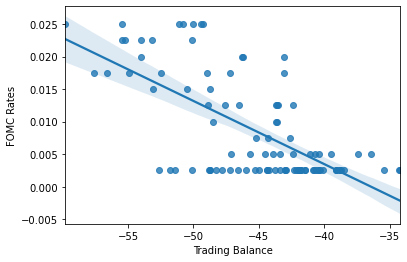

In [14]:
sns.regplot(x='Trading Balance', y='FOMC Rates', data=df)

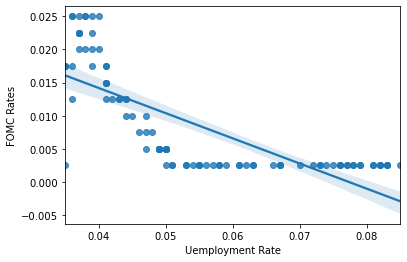

In [15]:
sns.regplot(x='Uemployment Rate', y='FOMC Rates', data=df)

## Model Building and Evaluation

In [41]:
lm_scores = []
rm_scores = []
rm=Ridge(alpha=0.1)
M = df[['Trading Balance', 'Uemployment Rate']]
for degree in list(range(1,8)):
    pr = PolynomialFeatures(degree=degree)
    M_poly = pr.fit_transform(M)
    lm.fit(M_poly, Y)
    rm.fit(M_poly, Y)
    lm_scores.append(lm.score(M_poly, Y))
    rm_scores.append(rm.score(M_poly, Y))
lm_score = dict(zip(list(range(1,8)), lm_scores))
rm_score = dict(zip(list(range(1,8)), rm_scores))

C:\Users\The Presence\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.78093e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\The Presence\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37046e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\The Presence\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.87687e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [42]:
print(lm_score)
print(rm_score)

{1: 0.730621301092758, 2: 0.861086564545771, 3: 0.8627666308844104, 4: 0.8920563324638344, 5: 0.8977974162800851, 6: 0.8991668426252596, 7: 0.899205677987824}
{1: 0.5326032495720856, 2: 0.75751024338796, 3: 0.7881945727219035, 4: 0.8600990282210649, 5: 0.8655041232851776, 6: 0.8708854697265505, 7: 0.8731228365142912}


In [ ]:
lm_scores = []
rm_scores = []
rm=Ridge(alpha=0.1)
M = df[['Trading Balance', 'Uemployment Rate']]
M_train, M_test, Y_train, Y_test = train_test_split(M, Y, test_size=0.2, random_state=1)
for degree in list(range(1,8)):
    Input_1=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=degree)), ('model',LinearRegression())]
    Input_2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=degree)), ('model',Ridge(alpha=0.1))]
    pipe1=Pipeline(Input_1)
    pipe2=Pipeline(Input_2)
    M_poly1 = pr.fit_transform(M_train)
    M_poly2 = pr.fit_transform(M_test)
    pipe1.fit(M_poly1, Y_train)
    pipe2.fit(M_poly1, Y_train)
    lin_score = {'train_score': pipe1.score(M_poly1, Y_train), 'test_score': pipe1.score(M_poly2, Y_test)}
    lm_scores.append(lm.score(M_poly, Y))
    rm_scores.append(rm.score(M_poly, Y))
lm_score = dict(zip(list(range(1,8)), lm_scores))
rm_score = dict(zip(list(range(1,8)), rm_scores))

In [20]:
pr_2 = PolynomialFeatures(degree=3)

In [21]:
N = df.drop('FOMC Rates', axis=1)
N_poly = pr_2.fit_transform(N)

In [22]:
lm.fit(N_poly, Y)
lm.score(N_poly, Y)

0.9999999999999923

In [23]:
Y_hat = lm.predict(N_poly)

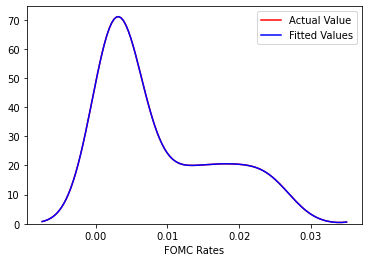

In [24]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [25]:
N_train, N_test, Y_train, Y_test = train_test_split(N, Y, test_size=0.2, random_state=1)
M_train, M_test, Z_train, Z_test = train_test_split(M, Y, test_size=0.2, random_state=1)

print("number of test samples :", N_test.shape[0])
print("number of training samples:",N_train.shape[0])

number of test samples : 20
number of training samples: 79


In [26]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]
Input_2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=7)), ('model',LinearRegression())]

In [27]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
pipe.fit(N_train, Y_train)
pipe.score(N_train, Y_train)

0.9440583147812138

In [29]:
pipe.score(N_test, Y_test)

0.7875166342103559

In [30]:
pipe_2 = Pipeline(Input_2)
pipe_2.fit(M_train, Z_train)
pipe_2.score(M_train, Z_train)

0.9458977154893973

In [31]:
pipe_2.score(M_test, Z_test)

0.9335469626252407

In [32]:
pipe_2['model'].intercept_

0.0021395550232030857

In [33]:
pipe_2['model'].coef_

array([ 2.26904482e-04, -1.98810847e-03,  4.70154882e-04, -6.24757429e-03,
        9.76533499e-03, -3.41734567e-03,  1.00113304e-02,  5.87388060e-04,
       -1.04583122e-02,  1.63833550e-03,  6.76938310e-05, -1.24336255e-02,
        2.00982816e-02, -6.49913458e-05,  2.92408558e-03, -7.40492723e-03,
        5.19469595e-03, -5.04325346e-03, -7.75572401e-03,  5.11165685e-03,
       -1.08668490e-03,  3.12358897e-03,  1.84143281e-04, -9.82299454e-03,
        1.48602795e-02, -9.47361735e-03, -2.77993969e-03, -2.41527574e-04,
        6.85169995e-04, -2.34802134e-03,  2.78139215e-03,  4.36093090e-03,
       -6.07094478e-03,  4.50394251e-03,  5.67767714e-04])